# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"
# Print (url)


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print ("Beginning Data Retrieval     ")
print ("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    #Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into the city_data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)
    
    # Indicate that data loading is complete
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | adamstown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | changzhi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | anabar
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | port-aux-francais
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | grytviken
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | new norfolk
-----------------------------
Data Retrieval Complete      
-------------------

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Windspeed     579
Country       579
Date          579
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,papatowai,-46.5619,169.4708,7.48,69,18,6.01,NZ,1724960019
1,adamstown,-25.0660,-130.1015,19.15,70,58,6.04,PN,1724960020
2,changzhi,35.2089,111.7386,22.19,92,0,1.09,CN,1724960021
3,port-aux-francais,-49.3500,70.2167,3.76,78,68,16.17,TF,1724960023
4,grytviken,-54.2811,-36.5092,0.41,96,100,1.01,GS,1724960025


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,7.48,69,18,6.01,NZ,1724960019
1,adamstown,-25.0660,-130.1015,19.15,70,58,6.04,PN,1724960020
2,changzhi,35.2089,111.7386,22.19,92,0,1.09,CN,1724960021
3,port-aux-francais,-49.3500,70.2167,3.76,78,68,16.17,TF,1724960023
4,grytviken,-54.2811,-36.5092,0.41,96,100,1.01,GS,1724960025


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

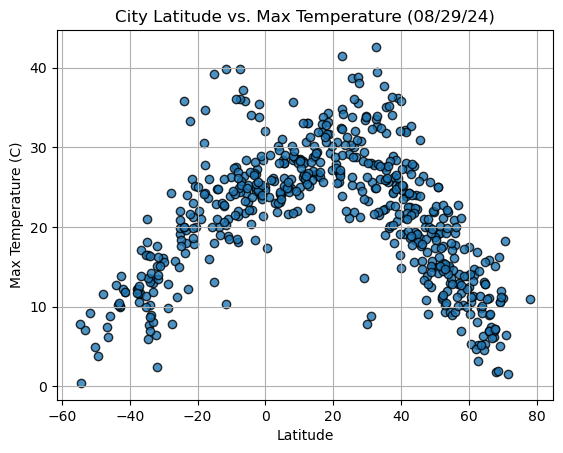

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" %time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

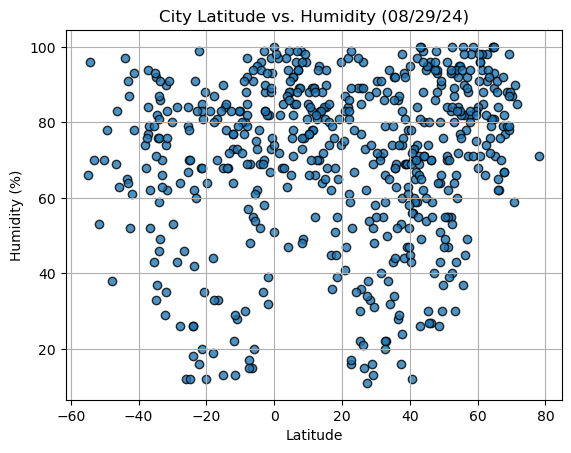

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" %time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

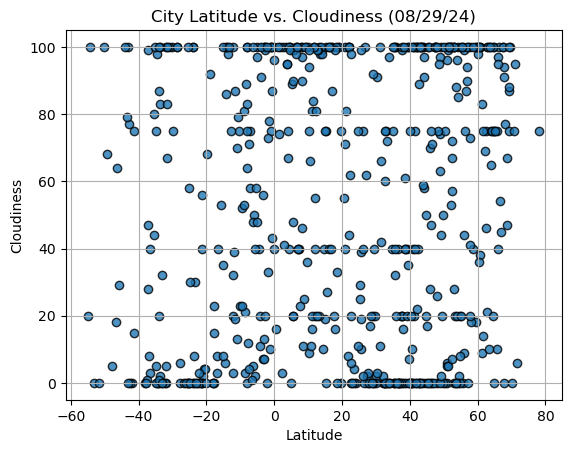

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" %time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

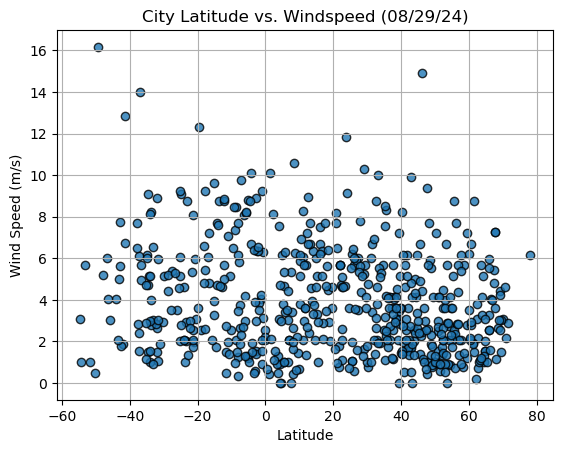

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Windspeed"], edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed (%s)" %time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    slope, intercept, rvalue, pvalue, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values, y_values, color="blue")
    plt.plot(x_values, regress_values, color='red', label='Regression Line')
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs. {title}")
    print(f"The r^2 value is: {rvalue}")
    plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
2,changzhi,35.2089,111.7386,22.19,92,0,1.09,CN,1724960021
6,petropavlovsk-kamchatsky,53.0452,158.6483,9.33,93,0,4.00,RU,1724960027
7,whitehorse,60.7161,-135.0538,10.61,71,100,6.69,CA,1724960028
10,yellowknife,62.4560,-114.3525,16.90,74,75,3.09,CA,1724960031
12,port blair,11.6667,92.7500,26.02,89,100,3.60,IN,1724959862


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,7.48,69,18,6.01,NZ,1724960019
1,adamstown,-25.0660,-130.1015,19.15,70,58,6.04,PN,1724960020
3,port-aux-francais,-49.3500,70.2167,3.76,78,68,16.17,TF,1724960023
4,grytviken,-54.2811,-36.5092,0.41,96,100,1.01,GS,1724960025
5,new norfolk,-42.7826,147.0587,9.95,87,77,5.62,AU,1724960026


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.7269159013883358


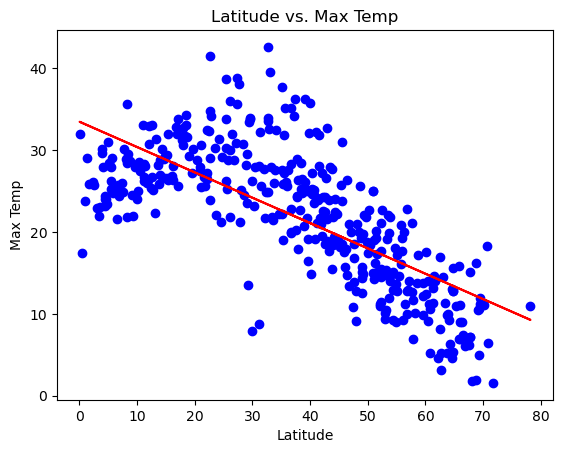

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
line_eq = plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))
#plt.annotate(line_eq, (-30, 40), fontsize=15, color="red")


The r^2 value is: 0.7744038487627141


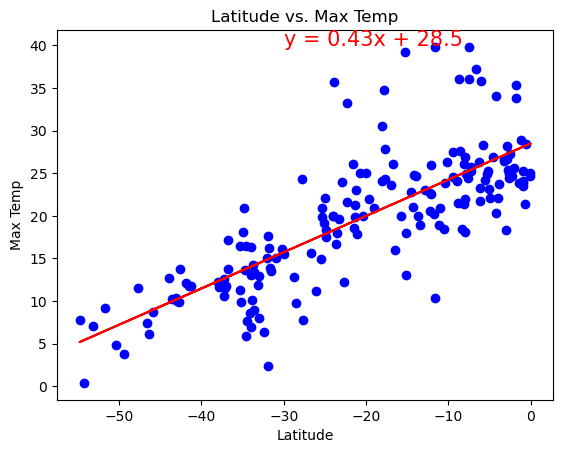

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
line_eq = plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [40]:
# because the southern and northern hemispheres have opposite seasons, it makes sense that the slope of the line is opposite. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.04868223659678923


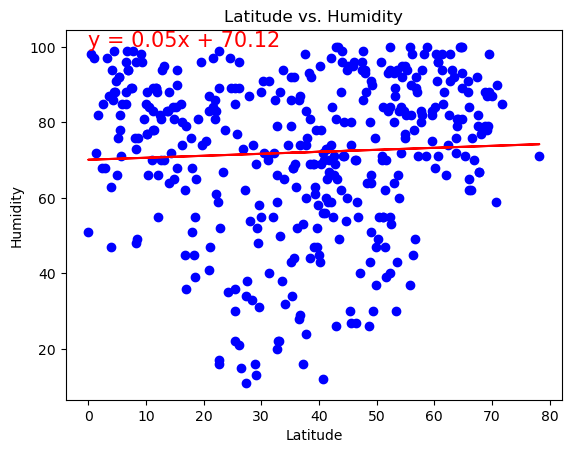

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
line_eq = plot_linear_regression(x_values,y_values, 'Humidity', (0,100))

The r^2 value is: 0.020262098074104697


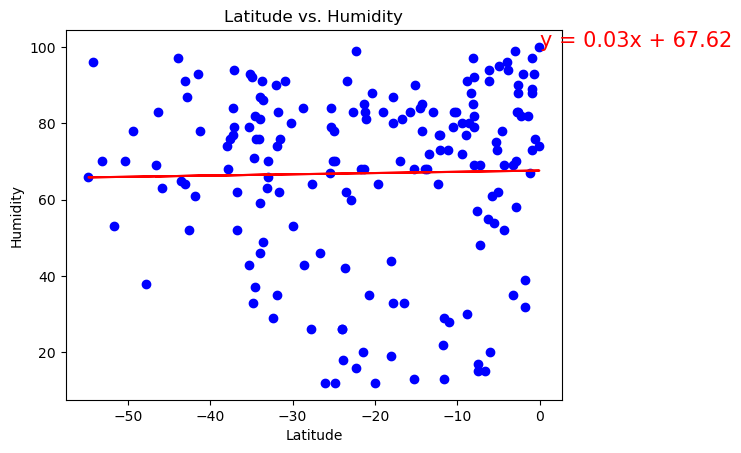

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
line_eq = plot_linear_regression(x_values,y_values, 'Humidity', (0,100))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [43]:
# Again if the seasons are opposite of each other, it would make sense that the humidity trends would also be opposite.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.011688999616210527


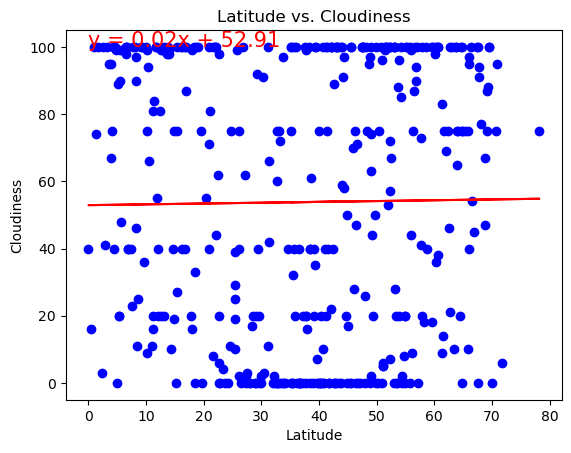

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
line_eq = plot_linear_regression(x_values,y_values, 'Cloudiness', (0,100))

The r^2 value is: 0.16845949224377255


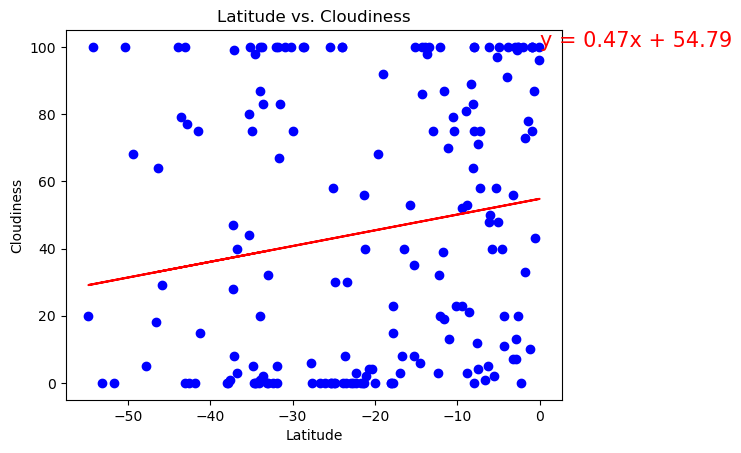

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
line_eq = plot_linear_regression(x_values,y_values, 'Cloudiness', (0,100))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [46]:
# Clouds exist in warm and cold seasons, so it makes sense that the slopes are similar.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: -0.13086819123921636


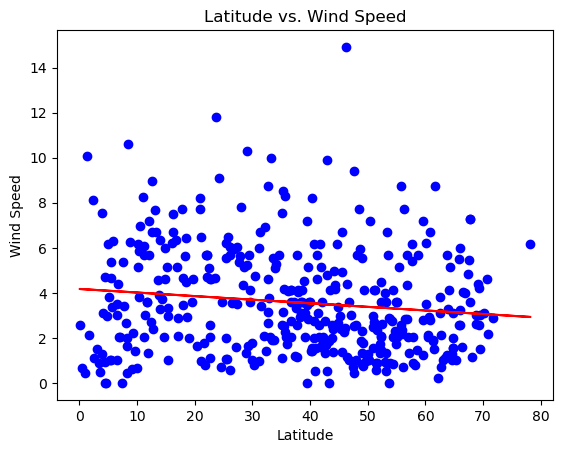

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
line_eq = plot_linear_regression(x_values,y_values, "Wind Speed", (0,20))

The r^2 value is: -0.04138573772434298


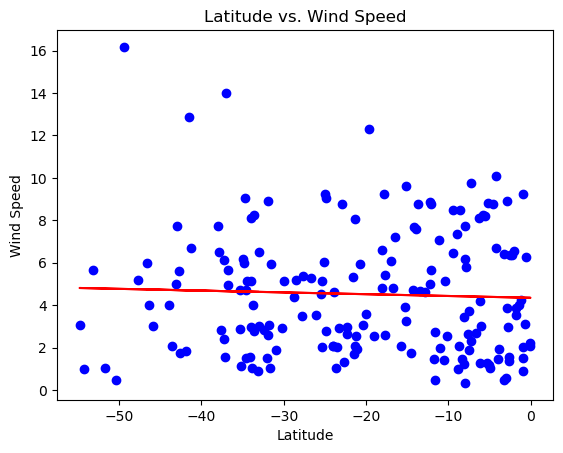

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
line_eq = plot_linear_regression(x_values,y_values, "Wind Speed", (0,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [49]:
# Regardless of hemisphere, wind speeds seem to be fairly consistent.